# TensorFlow Biomech Pitch Speed Prediction
### Mojisoluwa (Jiso) Awe

In this notebook I will be implementing TensorFlow to try and predict pitch velocity based on kinematic movements.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

2024-10-20 17:52:37.734956: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
biomech = pd.read_csv('pitching_poi_metrics.csv')
metadata = pd.read_csv('pitching_metadata.csv')
data = pd.merge(biomech, metadata)

In [4]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
session,411.0,2601.425791,621.963916,1031.0000,1830.00000,2861.0000,2999.00000,3252.0000
pitch_speed_mph,411.0,84.703650,4.717685,69.5000,81.40000,85.3000,87.90000,94.4000
max_shoulder_internal_rotational_velo,411.0,4531.491520,316.168115,2717.6363,4325.99210,4533.2480,4746.19065,5412.5614
max_elbow_extension_velo,411.0,2464.545988,239.251235,1771.5880,2307.80385,2445.8177,2610.56920,3100.2661
max_torso_rotational_velo,411.0,1054.802963,88.359211,848.3836,997.25935,1049.6915,1110.14260,1383.2367
...,...,...,...,...,...,...,...,...
peak_rfd_lead,403.0,6742.597778,24859.420751,14.3196,51.91420,73.9312,116.00690,144366.6836
user,411.0,1219.394161,472.942641,2.0000,890.00000,1540.0000,1620.00000,1756.0000
session_mass_kg,411.0,90.289577,9.904289,69.4008,83.46240,88.9056,96.16320,118.3896
session_height_m,411.0,1.851419,0.069528,1.6764,1.80340,1.8542,1.90500,2.0320


In [5]:
data.isnull().sum().max()

8

In [6]:
data = data.dropna()

In [7]:
cat = data.select_dtypes(include = ['object', 'category'])
list(cat.columns)

['session_pitch',
 'p_throws',
 'pitch_type',
 'playing_level',
 'filename_new',
 'modelname_new']

In [8]:
merged_data = data.drop(columns = ['session_pitch','filename_new', 'modelname_new', 'pitch_type'])
data = pd.get_dummies(merged_data)

In [9]:
data.corr()['pitch_speed_mph'].sort_values()

playing_level_high_school           -0.329637
arm_slot                            -0.307393
p_throws_L                          -0.231591
torso_lateral_tilt_br               -0.213563
stride_angle                        -0.197838
                                       ...   
shoulder_internal_rotation_moment    0.516925
thorax_distal_transfer_fp_br         0.636098
shoulder_transfer_fp_br              0.642701
elbow_transfer_fp_br                 0.682210
pitch_speed_mph                      1.000000
Name: pitch_speed_mph, Length: 88, dtype: float64

In [10]:
y = data['pitch_speed_mph']
X = data.drop(columns = ['pitch_speed_mph'])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 234)

In [12]:
X_train.shape

(270, 87)

In [13]:
#building tensorflow model
model = keras.Sequential([
    layers.InputLayer(shape = (X_train.shape[1],)),
    layers.Dense(87, activation = 'relu'),
    layers.Dense(45, activation = 'relu'),
    layers.Dense(32, activation = 'relu'),
    layers.Dense(1)
])

model.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['mean_absolute_error'])

In [14]:
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 100)

Epoch 1/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 65ms/step - loss: 1457238.3750 - mean_absolute_error: 454.4163 - val_loss: 226746.7188 - val_mean_absolute_error: 190.7962
Epoch 2/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 123445.8828 - mean_absolute_error: 127.9427 - val_loss: 67476.9609 - val_mean_absolute_error: 127.4469
Epoch 3/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 44072.9609 - mean_absolute_error: 99.5107 - val_loss: 69532.9922 - val_mean_absolute_error: 107.0831
Epoch 4/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 63905.4336 - mean_absolute_error: 101.8652 - val_loss: 12392.0342 - val_mean_absolute_error: 43.5135
Epoch 5/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 8236.0537 - mean_absolute_error: 38.0559 - val_loss: 12104.4287 - val_mean_absolute_error: 42.6395
Epoch 6/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 3212.2910 - mean_absolute_error: 26.6771 - val_loss: 4348.3975 - val_mean_absolute_error: 28.4101
Epoch 7/100
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

In [15]:
predictions = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


In [17]:
print('Mean Absolute Error:', mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', mean_squared_error(y_test, predictions))
print('Mean Square Root Error:', np.sqrt(mean_squared_error(y_test, predictions)))

Mean Absolute Error: 17.76755465744133
Mean Squared Error: 2984.345366383074
Mean Square Root Error: 54.629162233948584


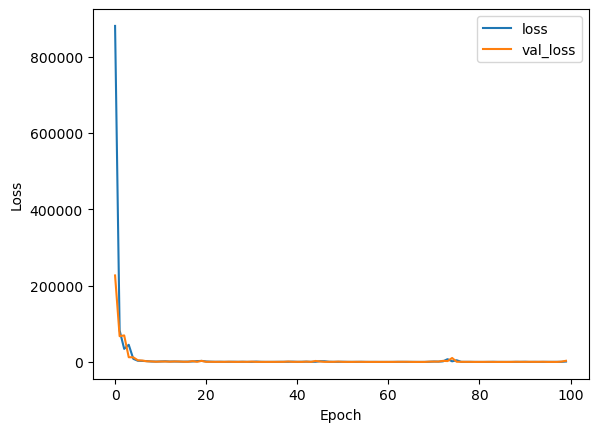

In [19]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

Looking at the loss and validation loss, at the beginning the model isn't fitting the data well, with a large spike around the 10th epoch. The training loss and validation loss begin to stabilize around the 20th epoch. The big spikes from 0-19 epochs indicate the model needs more hyperparameter tuning.

## Hyperparameter Tuning

In [21]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 10, restore_best_weights = True)

reduce_lr = ReduceLROnPlateau(monitor = 'val_loss', factor = 0.1, patience = 5, min_lr = 1e-6)

model.compile(optimizer = Adam(learning_rate = 1e-4),
             loss = 'mean_squared_error')

history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                   epochs = 100, batch_size = 64,
                   callbacks = [early_stopping, reduce_lr])

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 105ms/step - loss: 2426.8284 - mean_absolute_error: 14.2187 - val_loss: 383.0619 - val_mean_absolute_error: 10.0899 - learning_rate: 1.0000e-04
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 710.4286 - mean_absolute_error: 10.6694 - val_loss: 3865.0493 - val_mean_absolute_error: 20.2401 - learning_rate: 1.0000e-04
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 4214.3604 - mean_absolute_error: 20.4062 - val_loss: 71.2145 - val_mean_absolute_error: 6.0596 - learning_rate: 1.0000e-04
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 392.0370 - mean_absolute_error: 7.9126 - val_loss: 2009.3572 - val_mean_absolute_error: 15.7510 - learning_rate: 1.0000e-04
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 1845.8474 - mean_absolute_error: 14.6387 - val_loss: 96.6843 - val_mean_absolute_error: 6.0855 - learning_rate: 1.0000e-04
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 351.3550 - mean_absolute_error:

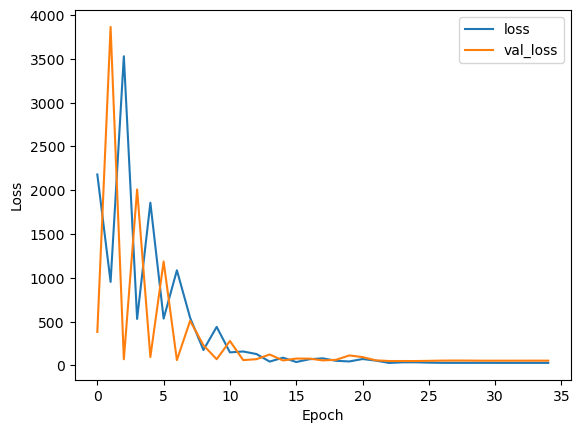

In [22]:
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [23]:
pred = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


In [24]:
print('Mean Absolute Error:', mean_absolute_error(y_test, pred))
print('Mean Squared Error:', mean_squared_error(y_test, pred))
print('Mean Square Root Error:', np.sqrt(mean_squared_error(y_test, pred)))

Mean Absolute Error: 4.996142377351461
Mean Squared Error: 50.74557001983966
Mean Square Root Error: 7.123592493948518


In [25]:
print('', data['pitch_speed_mph'].mean())

 84.77766749379651


The absolute error is about ~5 mph and the average velocity in the dataset is 84.778 mph, which is about a 5.9 percent error that the model is making.